# PROJECT CAPSTONE ⛄: Analisis Dokumen Twitter

#### By Dimas Angga Wijaya Mukti / B3106

In [1]:
# import module yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import itertools
import collections
import nltk

In [3]:
txt = "Kemarin hujan di Mandalika"
x = re.search("^Kemarin.*Mandalika$", txt)
print(x.group(0))

Kemarin hujan di Mandalika


In [9]:
x = re.findall("[a-m]", txt)
print(x)

['e', 'm', 'a', 'i', 'h', 'j', 'a', 'd', 'i', 'a', 'd', 'a', 'l', 'i', 'k', 'a']


In [13]:
# Mengambil data dalam bentuk digit
txt = "Tiket ada 1000"
x = re.findall("\d", txt) # +
print(x)

['1', '0', '0', '0']


In [14]:
# Menarik karakter apa saja
txt = "hello world"
x = re.findall("he..o", txt)
print(x)

['hello']


In [15]:
# Mengeluarkan awalan
txt = "hello world"
x = re.findall("^hello", txt)
if x:
    print("Ini diawali dari hello")
else:
    print("Tidak diawali")

Ini diawali dari hello


In [16]:
# Mengeluarkan akhiran
txt = "hello world"
x = re.findall("world$", txt)
if x:
    print("Ini diakhiri dari world")
else:
    print("Tidak diawali")

Ini diakhiri dari world


In [17]:
# nol atau lebih
txt = "hello world"
x = re.findall("he.*o", txt)
print(x)

['hello wo']


In [18]:
# satu atau lebih
txt = "hello world"
x = re.findall("he.+o", txt)
print(x)

['hello wo']


In [19]:
# satu atau lebih
txt = "hello world"
x = re.findall("he.?o", txt) # Ini mengeluarkan he. dicari
print(x)

[]


In [20]:
# jumlah any character
txt = "hello world"
x = re.findall("he.{2}o", txt)
print(x)

['hello']


In [21]:
txt = "Mandalika tempat turnamen motor balap"
# check jika mengandung motor atau mobil
x = re.findall("motor|mobil", txt)
print(x)
if x:
    print("Ada satu!")
else:
    print("Tiada")

['motor']
Ada satu!


In [22]:
# spesifik karakter diawal
txt = "Kemarin hujan di Mandalika"
x = re.findall("\AKemarin", txt)
print(x)

['Kemarin']


In [23]:
# mencari diakhir kata
txt = "Kemarin hulika di Mandalika"
x = re.findall(r"lika\b", txt)
print(x)

['lika', 'lika']


In [26]:
txt = "Kini tiket tinggal 200 saja"
x = re.findall(r"\D+", txt)
print(x)

['Kini tiket tinggal ', ' saja']


In [30]:
txt = "Kini tiket saja tinggal 200 saja"
x = re.findall(r"saja\Z", txt)
print(x)

['saja']


In [31]:
lean = pd.DataFrame({"Data":["Bogor", "Cianjur", "Bali"], "Berat":["20 meter", "30 meter", "40 meter"]})
lean["w"] = lean["Berat"].apply(lambda x: re.sub("[A-Za-z]+", "",x))

In [32]:
lean

,Data,Berat,w
0,Bogor,20 meter,20
1,Cianjur,30 meter,30
2,Bali,40 meter,40


## Exercise 1 💻: Text dalam Kolom

In [4]:
data = {"lokasi":["Bogor", "Jakarta", "Bandung", "Solo"],
        "jarak":["Bogor memiliki jarak 20 meter", 
                 "Jakarta kebanyakan lebih dari 50 centimeter", 
                 "Jakarta Bandung bisa 40 kilometer", 
                 "Kalau ke Solo ada 99 meter per gedung"]}
df_data = pd.DataFrame(data)
df_data

,lokasi,jarak
0,Bogor,Bogor memiliki jarak 20 meter
1,Jakarta,Jakarta kebanyakan lebih dari 50 centimeter
2,Bandung,Jakarta Bandung bisa 40 kilometer
3,Solo,Kalau ke Solo ada 99 meter per gedung


In [156]:
df_data["satuan"] = df_data["jarak"].apply(lambda x: re.findall("\D*meter",x)[0].strip())
df_data["angka"] = df_data["jarak"].apply(lambda x: re.findall("\d+",x)[0])

In [157]:
df_data

,lokasi,jarak,satuan,angka
0,Bogor,Bogor memiliki jarak 20 meter,meter,20
1,Jakarta,Jakarta kebanyakan lebih dari 50 centimeter,centimeter,50
2,Bandung,Jakarta Bandung bisa 40 kilometer,kilometer,40
3,Solo,Kalau ke Solo ada 99 meter per gedung,meter,99


## Exercise 2 💻: Text dalam Twitter

Aturan
1. Semua kata hastag diambil dalam bentuk list
2. Hastag tersebut dalam huruf kecil semua


In [252]:
data = {"Nama":["Afifah", "Amani", "Joko"], 
        "Tweet":["Selamat pagi :)) Have a nice day ;)  #Semangat", 
                 "Good morning everyone! Have a nice day. #greeting #sekolah #salam #semangat #berkarya", 
                 "Assamulaikum.. Selamat Pagi #Semangat #Bogor"]}
tweet_df = pd.DataFrame(data)

In [253]:
tweet_df

,Nama,Tweet
0,Afifah,Selamat pagi :)) Have a nice day ;) #Semangat
1,Amani,Good morning everyone! Have a nice day. #greet...
2,Joko,Assamulaikum.. Selamat Pagi #Semangat #Bogor


In [270]:
def convert_to_lower(string):
    list_string = re.findall("#([A-z]+)",string)
    return list(map(lambda x: x.lower(), list_string))

tweet_df["hash_word"] = tweet_df["Tweet"].apply(convert_to_lower)

In [271]:
tweet_df

,Nama,Tweet,hash_word
0,Afifah,Selamat pagi :)) Have a nice day ;) #Semangat,[semangat]
1,Amani,Good morning everyone! Have a nice day. #greet...,"[greeting, sekolah, salam, semangat, berkarya]"
2,Joko,Assamulaikum.. Selamat Pagi #Semangat #Bogor,"[semangat, bogor]"


## Study Case 💻: Twitter Analysis

Lakukan analisa dari data yang dibagikan tersebut ☕ tanpa memberitahu konten dari data tersebut tentang apa. Cari tahu data apa yang dihighlight dan digunakan. Data yang didapatkan terdapat 3000 row yang berisikan 3 bagian (id, tweet dan label). 💃

Sudah siapkah kamu? Memulai perjalananmu dalam menganalisa data! ⛸

In [10]:
# Buat Function Regex untuk hapus emoticon [QUESTION 1]
def emoticon_regex(data):
    emoj = re.compile("["
                        u"\U0001F600-\U0001F64F"  
                        u"\U0001F300-\U0001F5FF"  
                        u"\U0001F680-\U0001F6FF"  
                        u"\U0001F1E0-\U0001F1FF"  
                        u"\U00002500-\U00002BEF"  
                        u"\U00002702-\U000027B0"
                        u"\U00002702-\U000027B0"
                        u"\U000024C2-\U0001F251"
                        u"\U0001f926-\U0001f937"
                        u"\U00010000-\U0010ffff"
                        u"\u2640-\u2642" 
                        u"\u2600-\u2B55"
                        u"\u200d"
                        u"\u23cf"
                        u"\u23e9"
                        u"\u231a"
                        u"\ufe0f"  
                        u"\u3030"
                        "]+", flags=re.UNICODE)
    text = emoj.sub(r'', str(data))
    return text

In [11]:
# memanggil data yang digunakan [QUESTION 2]
df = pd.read_csv('tweet_data.tsv',sep='\t')
df_tweet = df["tweet"]
df_tweet = df_tweet.apply(emoticon_regex)
df_tweet.head()

0    on nov 4 this country needs to ask for account...
1    join our discord server and our channel this i...
2    did you know football analyst amp former qb te...
3    whatever the situation if you can t take it an...
4    for more amp resources amp actionable steps mo...
Name: tweet, dtype: object

In [47]:
# Mengali kata yang sering muncul tanpa STOPWORDS [QUESTION 3]
word_in_tweet = [re.findall("\S+",i) for i in df_tweet] 

count_word_clean = collections.Counter()
for words in word_in_tweet:
    for word in words:
        count_word_clean[word] += 1
  
count_word_clean.most_common(15)

[('to', 2232),
 ('the', 1981),
 ('and', 1568),
 ('a', 1310),
 ('of', 1287),
 ('you', 1138),
 ('for', 1035),
 ('in', 940),
 ('is', 934),
 ('i', 693),
 ('on', 637),
 ('this', 614),
 ('with', 595),
 ('it', 580),
 ('are', 543)]

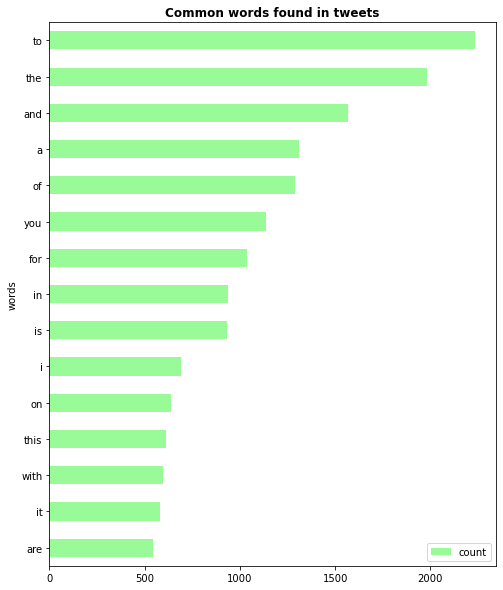

In [48]:
# Menampilkan Grafik yang diperlukan [QUESTION 4]
clean_tweets_word = pd.DataFrame(count_word_clean.most_common(15), columns=["words","count"])
fig, ax = plt.subplots(figsize = (8,10))
clean_tweets_word.sort_values("count").plot.barh(x = 'words', y = 'count',ax=ax,color="#98FB98")
ax.set_title("Common words found in tweets", weight="bold")
plt.show()

In [49]:
# STOPWORDS yang perlu digunakan
from nltk.corpus import stopwords
nltk.download("stopwords")
stop_words = set(stopwords.words("english"))
# Uncomment dibawah untuk melihat isi dari listnya
# list(stop_words)[0:10]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [196]:
tweets_non_stop = []
for words in word_in_tweet:
    word_list = []
    for word in words:
        if word not in stop_words:
            word_list.append(word)
    tweets_non_stop.append(word_list)
    
counts_nsw = collections.Counter()
for words in tweets_non_stop:
    for word in words:
        counts_nsw[word] += 1

counts_nsw.most_common(15)        

[('amp', 439),
 ('health', 434),
 ('mental', 409),
 ('help', 243),
 ('people', 226),
 ('support', 203),
 ('us', 196),
 ('need', 163),
 ('time', 162),
 ('get', 159),
 ('today', 150),
 ('one', 149),
 ('care', 147),
 ('please', 142),
 ('take', 133)]

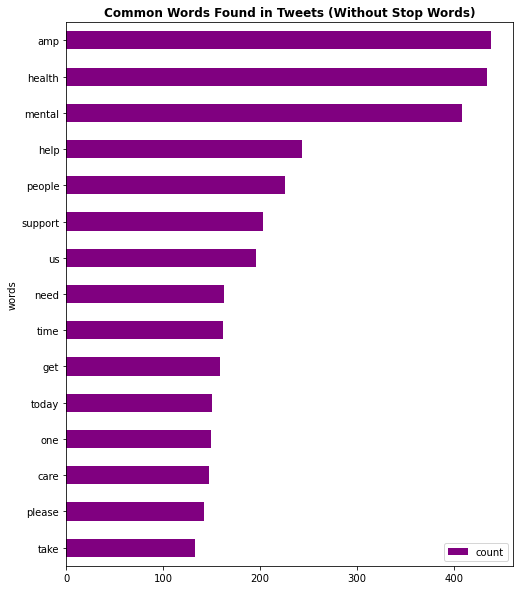

In [197]:
# Meanmpilkan grafik dari data diatas dengan stopwords [QUESTION 6]
clean_tweets_nsw = pd.DataFrame(counts_nsw.most_common(15), columns = ["words","count"])
fig, ax = plt.subplots(figsize = (8,10))
clean_tweets_nsw.sort_values("count").plot.barh(x = 'words', y = 'count', ax=ax, color="purple")
ax.set_title("Common Words Found in Tweets (Without Stop Words)", weight="bold")
plt.show()

In [185]:
from nltk import bigrams
bigram_words = list(bigrams(twits))
# Mengambil data Bigram [QUESTION 7]
bigram_counts = collections.Counter()
for word in bigram_words:
    bigram_counts[word] += 1
    
bigram_counts.most_common(20) 

[(('mental', 'health'), 347),
 (('covid', '19'), 44),
 (('join', 'us'), 39),
 (('self', 'care'), 34),
 (('take', 'care'), 32),
 (('domestic', 'violence'), 27),
 (('health', 'issues'), 21),
 (('young', 'people'), 19),
 (('would', 'like'), 18),
 (('help', 'us'), 18),
 (('domestic', 'abuse'), 17),
 (('social', 'media'), 16),
 (('mental', 'illness'), 15),
 (('social', 'distancing'), 14),
 (('link', 'bio'), 14),
 (('help', 'need'), 13),
 (('online', 'therapy'), 13),
 (('19', 'pandemic'), 13),
 (('please', 'join'), 12),
 (('many', 'people'), 12)]

In [186]:
# Membuat data Bigram DataFrame [QUESTION 8]
bigram_df = pd.DataFrame(bigram_counts.most_common(20), columns = ["bigram_word","count"])

## Silahkan dapatkan variabel d untuk menjalankan grafik dibawah
d = bigram_df.copy()

In [187]:
## PLOT NETWORKS ##
import networkx as nx

# create network
G = nx.Graph()

# create connection antar node
for k, v in zip(d["bigram_word"],d["count"]):
    G.add_edge(k[0], k[1], weight =(v*10))

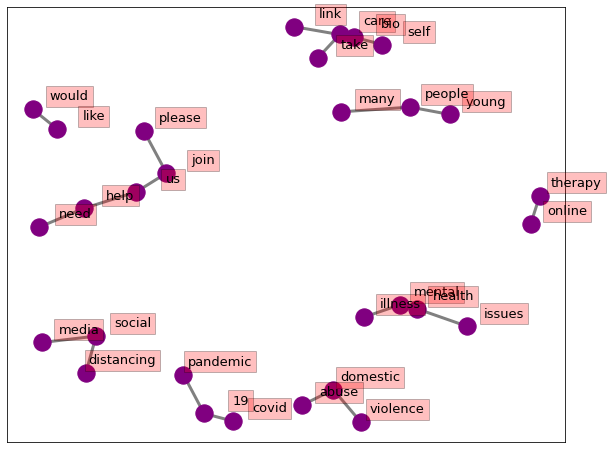

In [278]:
fig, ax = plt.subplots(figsize=(10,8))
pos = nx.spring_layout(G, k=2)

# plot networks
nx.draw_networkx(G, pos,
                    font_size=16,
                    width=3,
                    edge_color="grey",
                    node_color="purple",
                    with_labels=False,
                    ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='red', alpha=0.25),
            horizontalalignment='center', fontsize=13)
    
plt.show()

In [257]:
# Buat Function Regex untuk hapus satu huruf misal (S saja, atau M aja) [QUESTION 9]
def one_word(text):
    text_list = []
    for i in re.findall("[A-Za-z..+]+"," ".join(text)):
        if len(i) != 1:
            text_list.append(i)
    text = " ".join(text_list)
    return text

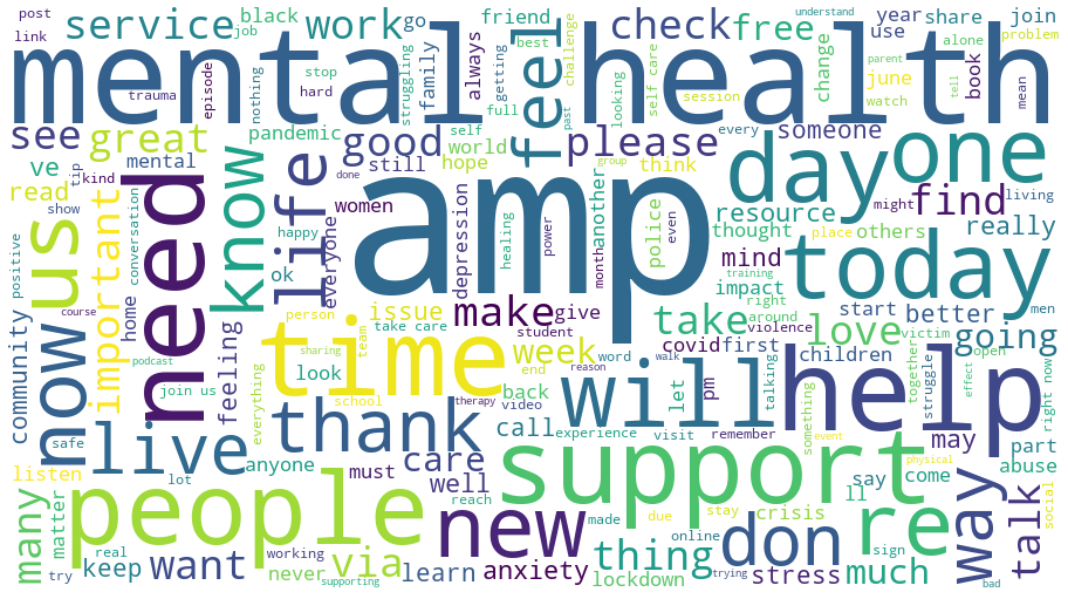

In [252]:
# Membuat WordCloud berdasarkan hastag [QUESTION 10]
from wordcloud import WordCloud
text = one_word([word for words in word_in_tweet for word in words])
wordcloud = WordCloud(width=900, height=500, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.tight_layout(pad=0)
plt.axis("off")
plt.show()

In [220]:
# Berikut ini contoh sentiment analysis
from textblob import TextBlob
sentiment_objects = [TextBlob(tweet) for tweet in [" ".join(tweet) for tweet in tweets_non_stop]]
sentiment_values = [[tweet.sentiment.polarity, str(tweet)] for tweet in sentiment_objects]
sentiment_df = pd.DataFrame(sentiment_values, columns=["polarity", "tweet"])
sentiment_df.head()

,polarity,tweet
0,-0.021212,nov 4 country needs ask accountability 109k am...
1,0.500000,join discord server channel safe space
2,0.100000,know football analyst amp former qb terry brad...
3,0.000000,whatever situation take anymore tune
4,0.000000,amp resources amp actionable steps move forwar...


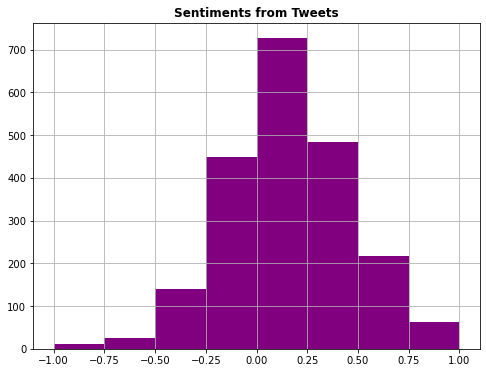

In [231]:
# untuk mendapatkan insight yang baik [QUESTION 11]
# kita hapus yang 0
sentiment_df_nozero = sentiment_df.drop(sentiment_df[sentiment_df["polarity"] == 0].index)

fig, ax = plt.subplots(figsize=(8, 6))
# Membuat Histogram [QUESTION 12]
sentiment_df_nozero.hist(column = "polarity", ax = ax, color = "purple", bins = 8)
plt.title("Sentiments from Tweets", weight="bold")
plt.show()

**Conclusion**:

Setelah melakukan analisis pada data tweet pada platform twitter diperoleh informasi sebagai berikut:
<ul>
<li><div align="justify"> Pada data tweet ini membahas tentang kondisi pandemi covid 19 yang sedang melanda saat ini. Kondisi ini mengharuskan kita untuk berhati-hati dan juga menjaga jarak satu sama lain. Pandemi juga membuat segala aktivitas pekerjaan, pendidikan dan sektor lain harus dilakukan secara online. Media sosial pun menjadi platform yang setiap hari digunakan. Hal ini menyebabkan banyak orang yang kehilangan pekerjaann. Beberapa orang mengalami stress, gangguan kejiwaan dan masalah kesehatan. Bahkan angka kejahatan dan kekerasan meningkat karena adanya pandemi ini. Kita dianjurkan untuk saling membantu sama lain untuk mengatasi hal ini.</li>
<li><div align="justify">Setelah dilakukan sentiment analysis dengan menggunakan Textblob, diperoleh hasil yaitu sebagian besar tweet yang ada memiliki kalimat yang positif. Akan tetapi, juga terdapat kalimat tweet yang memiliki kalimat negatif. Hal ini dapat dilihat pada histogram yang telah diperoleh, dimana nilai polarity positif dan mendekati 1 (+1) menggambarkan respon positif dari tweet tersebut. Sedangkan nilai polarity negatif dan mendekati -1 (-1) menggambarkan respon positif. Nilai polarity 0 dihilangkan karena nilai tersebut berarti bahwa kalimat yang ada pada tweet memiliki respon netral.</li>
</ul>